# **Car Price Prediction**
## **By: Arsh Vohra**

<img src="https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/99-best-luxury-cars-2023-bmw-i7-lead.jpg?itok=1azqGINZ">


## Description:
**In this project, we aim to develop a machine learning model that can accurately predict car prices based on various car specifications. The dataset contains information on car attributes such as fuel type, number of doors, car body type, engine size, horsepower, and more. We will preprocess the data by handling missing values and encoding categorical variables using one-hot encoding. Next, we will build a linear regression model to establish a baseline for prediction. However, to tackle potential overfitting issues and improve model performance, we will apply Lasso, Ridge, and ElasticNet regularization techniques. By tuning the regularization parameters, we will create a more reliable and interpretable car price prediction model capable of handling diverse datasets and providing valuable insights into the factors influencing car prices.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
plt.rcParams['figure.dpi']=600
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
df.isna().sum()/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df['doornumber'] = df.doornumber.map({'two':2,'four':4})
df['cylindernumber'] = df.cylindernumber.map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

# Inputs/Target cols 

In [8]:
input_cols = ['symboling','fueltype','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','aspiration']
traget_cols = 'price'

In [ ]:
numerical_cols = df[input_cols].select_dtypes(np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

## Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [10]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False).fit(df[categorical_cols])
encoded_cols = encoder.get_feature_names_out().tolist()

In [11]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [12]:
X= df[numerical_cols + encoded_cols]
Y=df[traget_cols]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

# OLS Model

In [46]:
def accuracy(x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    train_rmse = mean_squared_error(y_train,model.predict(x_train),squared=False)
    test_rmse = mean_squared_error(y_test,model.predict(x_test),squared=False)
    print("Accuracy on Train: {}".format(train_acc))
    print("Accuracy on Test:  {}".format(test_acc))
    print("RMSE on Train:     {}".format(train_rmse))
    print("RMSE on Test:      {}".format(test_rmse))

In [16]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)
accuracy(x_train,x_test,y_train,y_test)

Accuracy on Train: 0.9290486384271904
Accuracy on Test:  0.846840609325853
RMSE on Train:     2072.2528788409873
RMSE on Test:      3274.998281195079


In [17]:
model.feature_names_in_

array(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'aspiration_std', 'aspiration_turbo'],
      dtype=object)

In [18]:
weights_df = pd.DataFrame({
    "Variable":model.feature_names_in_,
    "Weights":model.coef_
})
weights_df.sort_values(by='Weights',ascending=False).head(10).tail(10)

,Variable,Weights
34,enginetype_rotor,6296.220082
27,enginelocation_rear,4181.028590
18,carbody_convertible,3918.817232
29,enginetype_dohcv,3844.242042
16,fueltype_diesel,3267.995486
38,fuelsystem_idi,3267.995486
25,drivewheel_rwd,1689.447006
32,enginetype_ohcf,1441.901487
31,enginetype_ohc,1316.745546
44,aspiration_turbo,930.852940


<Axes: title={'center': 'Important Features'}, xlabel='Weights', ylabel='Variable'>

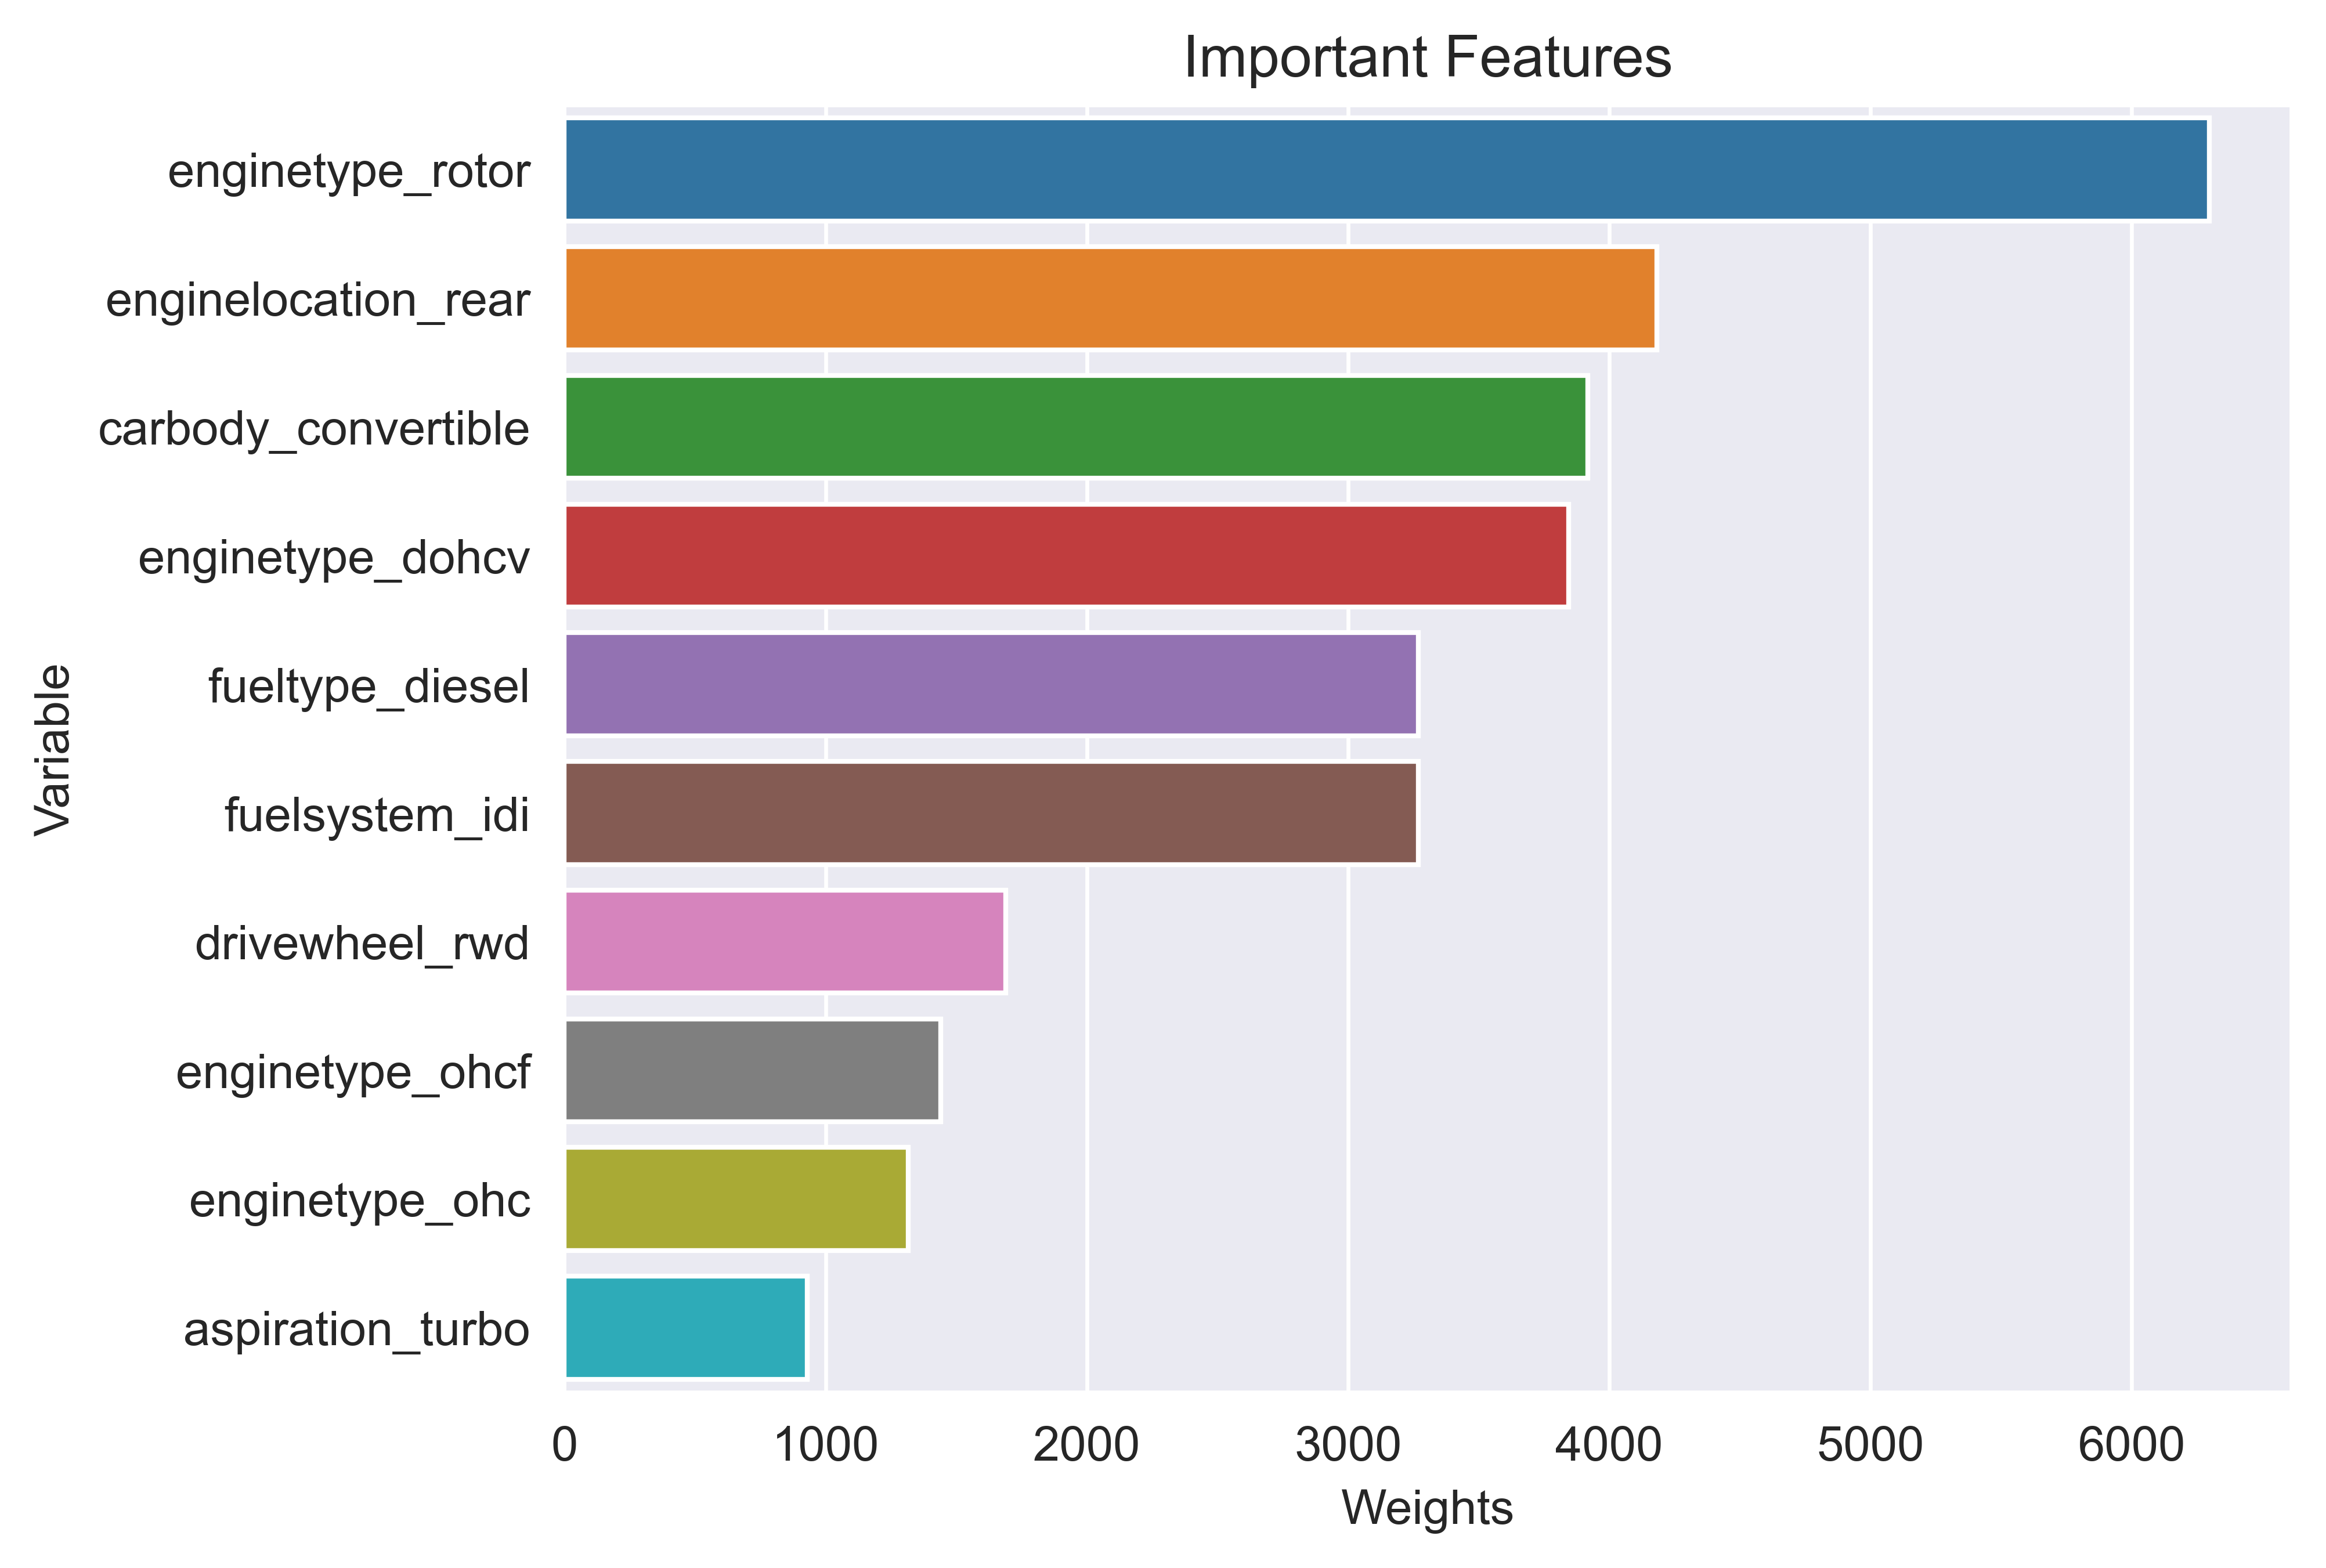

In [19]:
plt.title("Important Features")
sns.barplot(data=weights_df.sort_values(by='Weights',ascending=False).head(10),x='Weights',y='Variable')

# Regularization
**Let's use regularization techniques like Lasso, Ridge, and ElasticNet as our OLS model is overfitted.**

## Lasso or L1 Regularization

In [21]:
train_lasso = []
test_lasso = []
alpha_lasso = []
for i in np.arange(1,70,1)+1:
    model = Lasso(alpha=i)
    model.fit(x_train,y_train)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    train_lasso.append(train_acc)
    test_lasso.append(test_acc)
    alpha_lasso.append(i)

## Ridge or L2 Regularization

In [22]:
train_ridge = []
test_ridge = []
alpha_ridge = []
for i in np.arange(1,70,1)+1:
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    train_ridge.append(train_acc)
    test_ridge.append(test_acc)
    alpha_ridge.append(i)

## ElasticNet Regularization
**It combines both L1 and L2 regularization**

In [23]:
train_EN = []
test_EN = []
alpha_EN = []

for i in np.arange(1,70,1):
    model = ElasticNet(alpha=i)
    model.fit(x_train,y_train)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    train_EN.append(train_acc)
    test_EN.append(test_acc)
    alpha_EN.append(i)

In [24]:
train_EN_l = []
test_EN_l = []        
l1_EN = []       
for j in np.arange(0,1,0.1):
        model = ElasticNet(l1_ratio=j)
        model.fit(x_train,y_train)
        train_acc = model.score(x_train,y_train)
        test_acc = model.score(x_test,y_test)
        train_EN_l.append(train_acc)
        test_EN_l.append(test_acc)
        l1_EN.append(j)

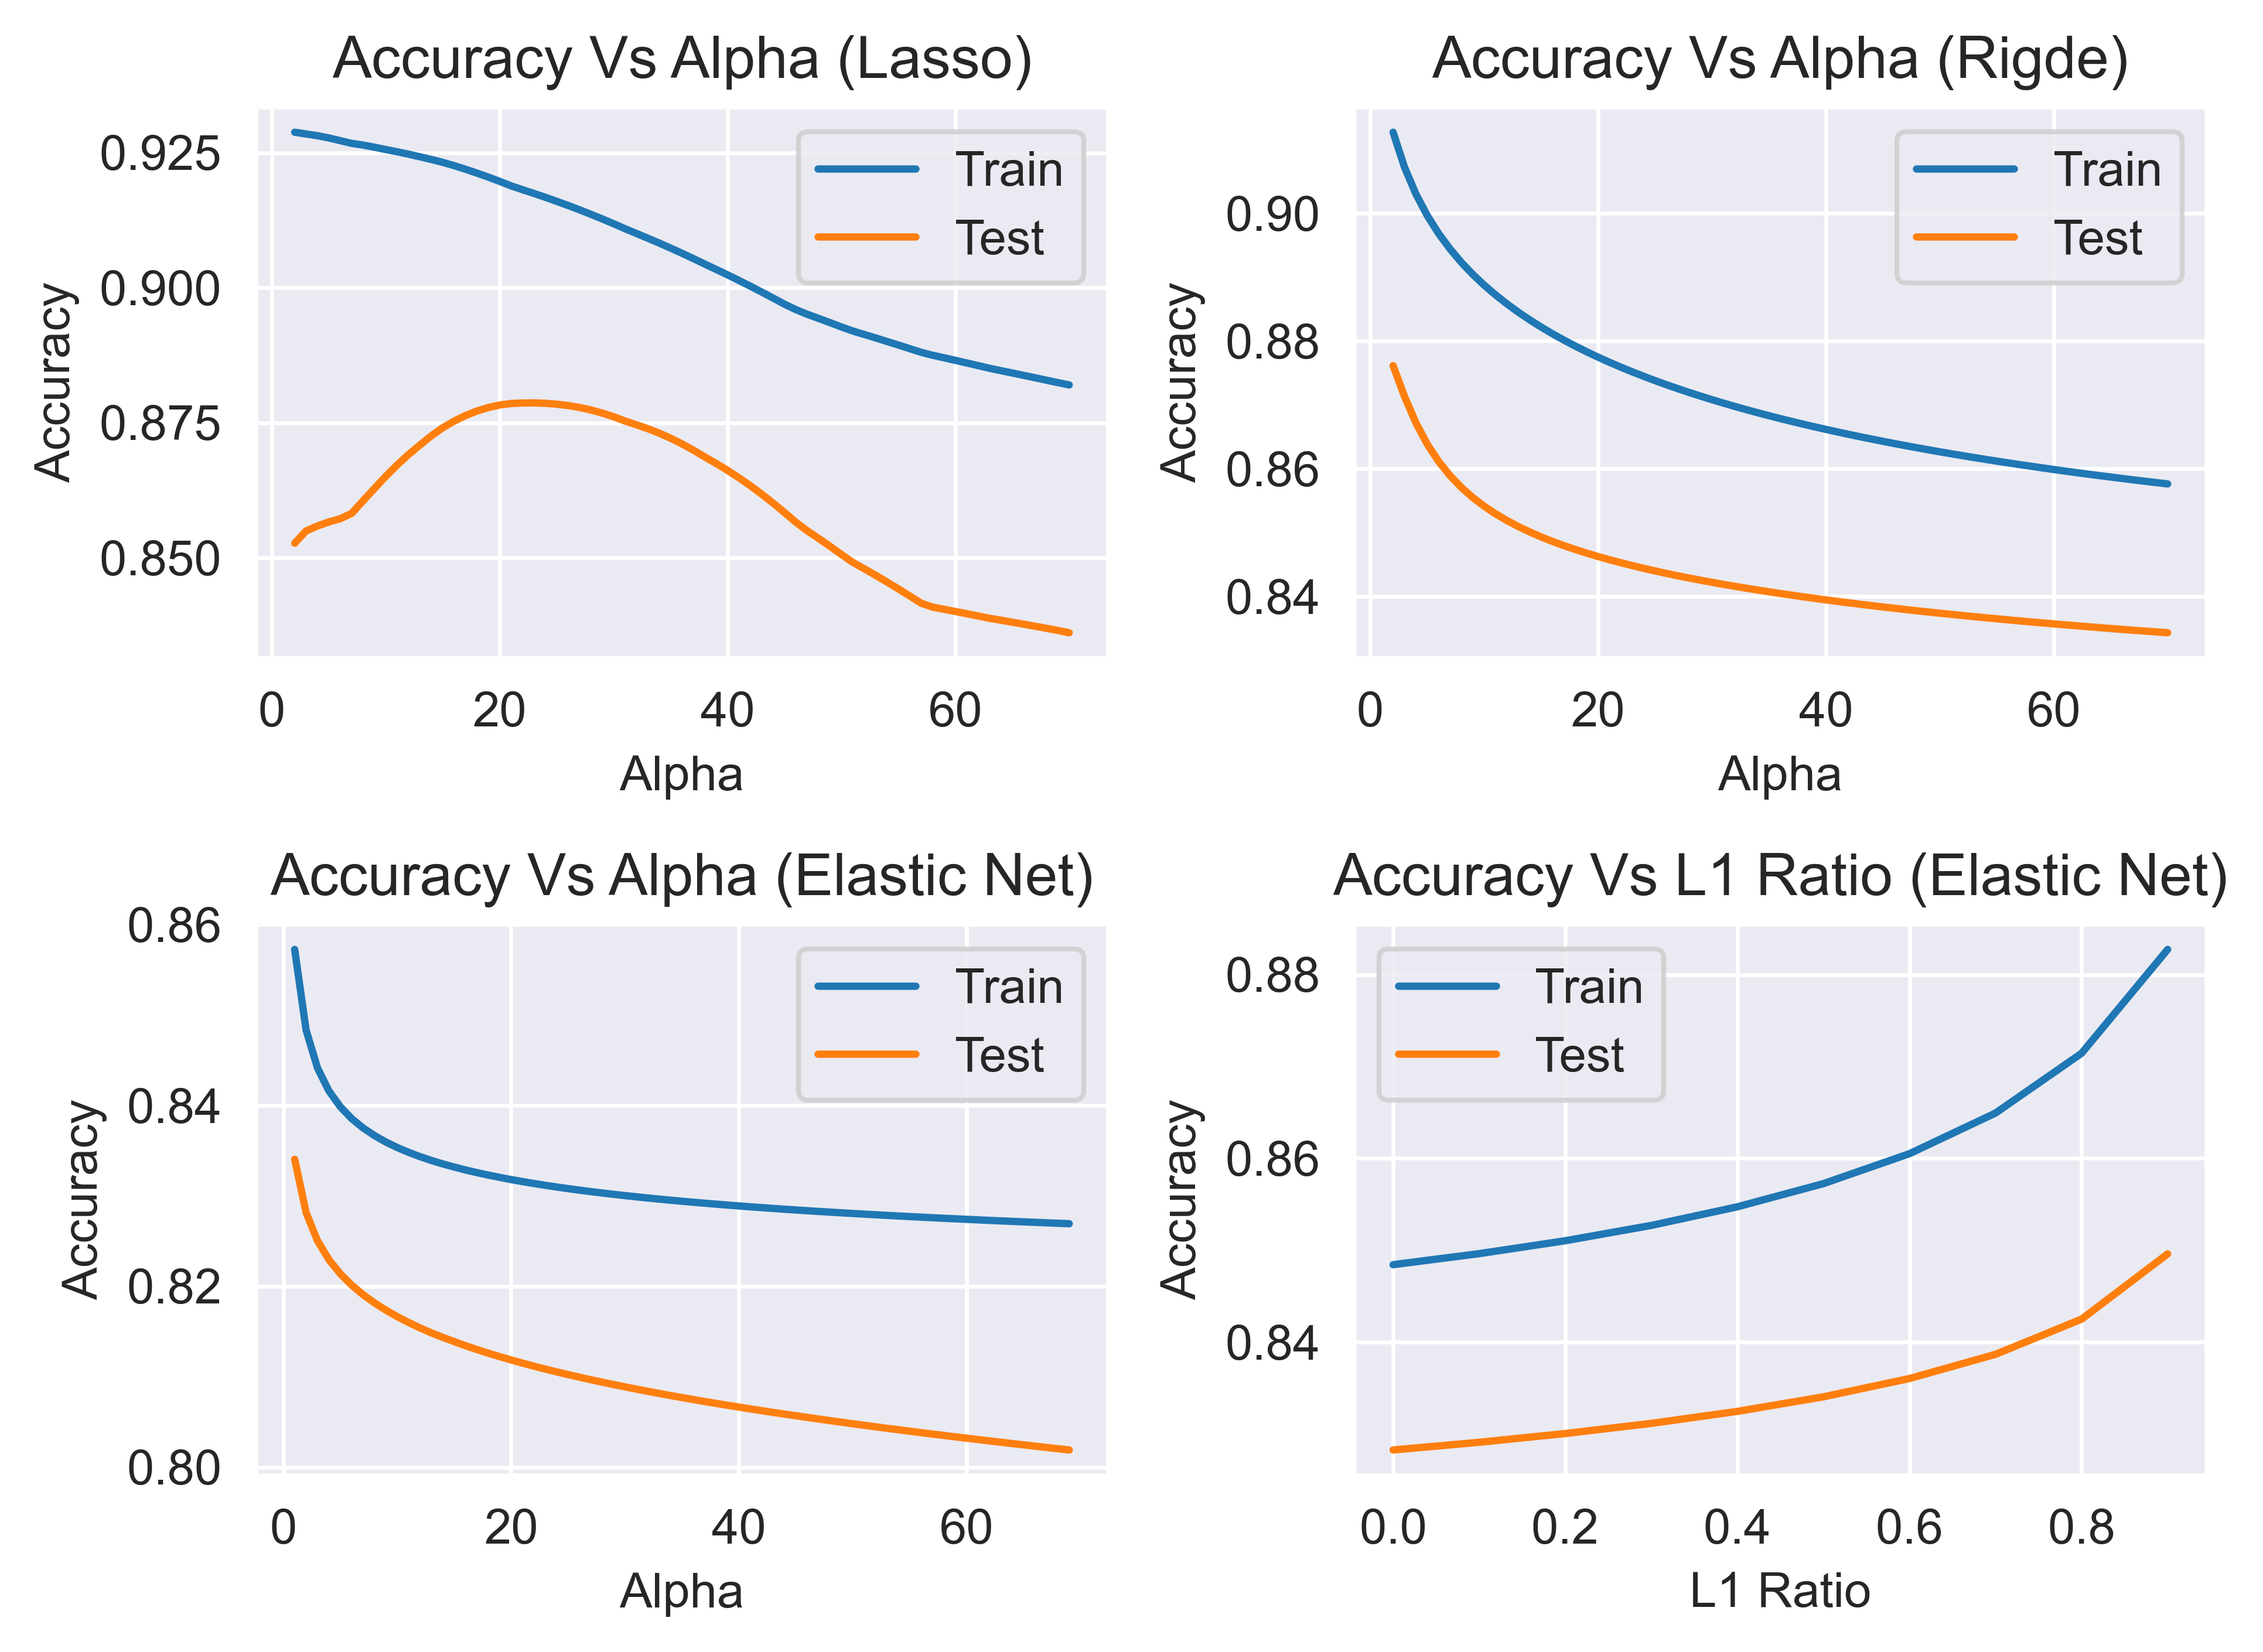

In [25]:
plt.subplot(2,2,1)
plt.plot(alpha_lasso,train_lasso)
plt.plot(alpha_lasso,test_lasso)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'])
plt.title("Accuracy Vs Alpha (Lasso)")

plt.subplot(2,2,2)
plt.plot(alpha_ridge,train_ridge)
plt.plot(alpha_ridge,test_ridge)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'])
plt.title("Accuracy Vs Alpha (Rigde)")

plt.subplot(2,2,3)
plt.plot(alpha_EN,train_EN)
plt.plot(alpha_EN,test_EN)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'])
plt.title("Accuracy Vs Alpha (Elastic Net)")

plt.subplot(2,2,4)
plt.plot(l1_EN,train_EN_l)
plt.plot(l1_EN,test_EN_l)
plt.xlabel("L1 Ratio")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'])
plt.title("Accuracy Vs L1 Ratio (Elastic Net)")

plt.tight_layout()


In [26]:
model = ElasticNet(alpha=3,l1_ratio=0.1)
model.fit(x_train,y_train)
accuracy(x_train,x_test,y_train,y_test)

Accuracy on Train: 0.8393983755858878
Accuracy on Test:  0.8209845753649365
RMSE on Train:     3117.72174070166
RMSE on Test:      3540.6621468178832


In [42]:
final_weights_df =pd.DataFrame({
    "Variable":model.feature_names_in_,
    "Weights":model.coef_
})

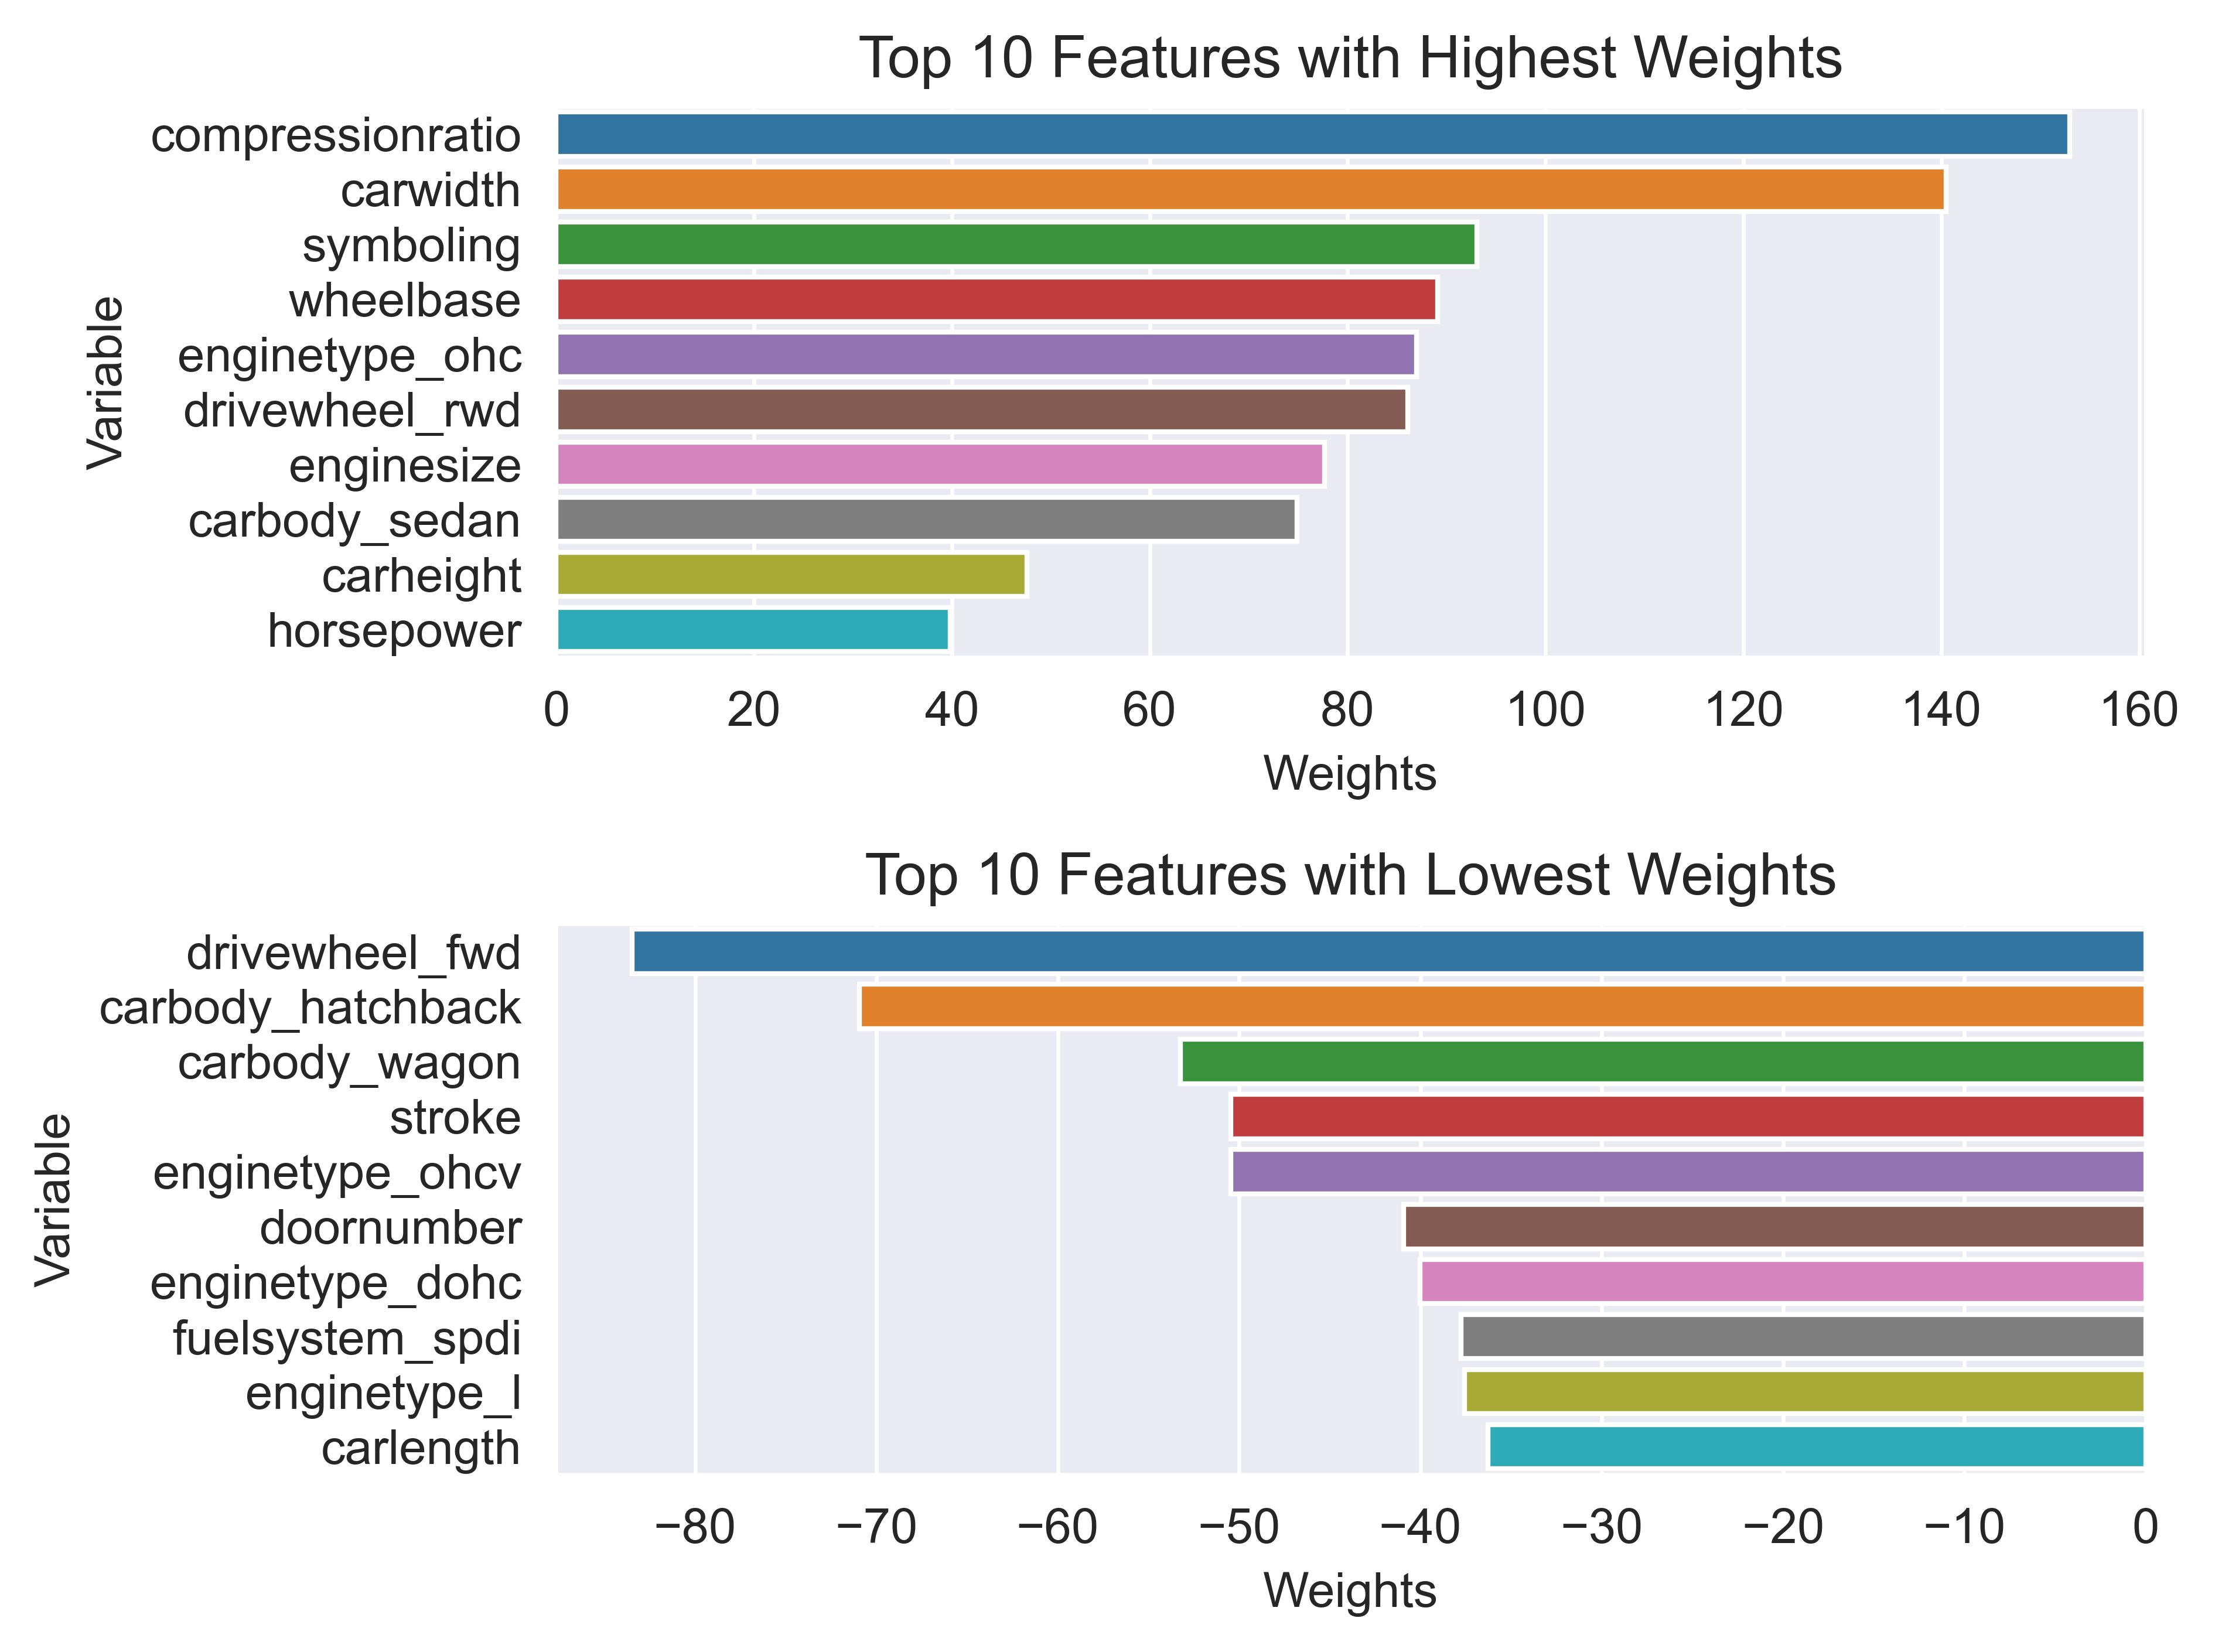

In [33]:
plt.subplot(2,1,1)
plt.title("Top 10 Features with Highest Weights")
sns.barplot(data=final_weights_df.sort_values('Weights',ascending=False).head(10),x='Weights',y='Variable')

plt.subplot(2,1,2)
plt.title("Top 10 Features with Lowest Weights")
sns.barplot(data=final_weights_df.sort_values('Weights',ascending=True).head(10),x='Weights',y='Variable')

plt.tight_layout()

## Summary:
**The "Car Price Prediction" project aimed to build an accurate car price prediction model. We used linear regression with regularization techniques like Lasso, Ridge, and ElasticNet to avoid overfitting. The final model achieved an R-squared value of approximately 0.83, demonstrating its ability to predict car prices based on essential attributes and providing valuable insights for the automotive industry.**